# **Projet Python 2A**
Charlotte de Romémont • Suzie Grondin • Michael Walkowiak

*Ce projet est réalisé dans le cadre du cours de Python de Lino Galiana pour l'année 2022-2023.*

L'objectif de ce projet est de mettre en avant les risques liés au stress hydrique, c'est à dire le manque d'eau, pour l'exploitation minière. L'extraction minière est indispensable pour l'économie mondiale et devrait fortement augmenter au cours des prochaines décennies, notamment car les technologies de la transition bas-carbone nécessitent une plus grande diversité de métaux que leurs alternatives utilisant des combustibles fossiles (voir par exemple [1] pour les batteries de véhicules électriques). 

Peu d'études ont directement porté sur le risque hydrique dans le secteur minier, comme le notent les membres du projet GENERATE de l'IFP Énergies nouvelles ([2]), malgré des conséquences déjà perceptibles du manque d'eau dans certaines régions minières d'importance mondiale ([3]).

Nous chercheront donc à évaluer quel pourcentage de la production de certains minéraux critiques se situe dans des zones à risque, tout en gardant à l'esprit que les procédés miniers peuvent être très consommateurs en eau et donc influer eux-mêmes sur le stress hydrique de leur environnement.


# Données utilisées
Nous utiliserons plusieurs jeux de données en accès libre sur internet et dont la récupération et l'exploitation est plus ou moins complexe: 


• Un recensement mondial de zones d’exploitations minières, associé à l'article de Maus, V., Giljum, S., Gutschlhofer, J. et al. A global-scale data set of mining areas. Sci Data 7, 289 (2020). https://doi.org/10.1038/s41597-020-00624-w. De notre point de vue, l'important est de noter que les données mises à disposition par les auteurs consistent essentiellement en des polygones qui correspondent aux zones occupées par des exploitations minières. Les données sont en format geopackage (.gpkg), et le système de coordonées est WGS 84. Nénamoins, ces polygones ne comportent pas d'information sur le type d'exploitation minière, seulement la zone occupée. Le jeu de données comporte une information sur le pays qui contient les polygones miniers, mais nous avons pu constater des erreurs et 
    
• Un webscrapping du site https://www.mindat.org/. Ces données consistent en des points qui indiquent la situation des mines, et des informations fines sur la localité administrative, la province et le pays. Par rapport aux données issues de l'article de Mauss, nous avons donc une information plus fine sur la localisation et la possibilité d'identifier le type de minral extrait. Étant donné la grande diversité des minéraux qui peuvent nous intéresser, nous avons choisi de focaliser cette étape de webscrapping sur les mines de cuivre, mais la structure du site mindat.org nous permet d'être confiants quand à la possibilité de reproduire la méthode pour d'autres minéraux. 

• Les données de production mondiale et pays par pays pour de nombreux minéraux d'intérêt, sur le site https://www.world-mining-data.info/?World_Mining_Data___Data_Section qui est tenu par le ministère des finances de la république d'Autriche. Ces données sont au format xlsx et réparties dans plusieurs onglets.

• Des scénarios de stress hydrique, à partir des travaux du World Resources Institute dans le cadre du projet Aqueduct (https://www.wri.org/aqueduct). Ces données consistent en des polygones couvrant la surface de la terre et en un ensemble d'indicateurs qui permettent de construire de plus de 100 scénarios de stress hydrique prévu, pour les années 2020, 2030, 2040 et selon des hypothèses optimistes, neutres ou négatives. Les données géographiques sont au format Shapefile (SHP) et le système de coordonées est WGS 84.


# Obtention des données et prétraitement

La plupart des données nécessaires sont importées par la fonction import_donnees dans import_preprocess_data.py. 
Cette fonction permet également de corriger certaines données. Par exemple, nous avions constaté que certains pays référencés dans les données de Mauss (2020) n'étaient pas les bons, certaines mines allemandes ou tchèques étant référencées en Pologne.  

## Webscraping

Le Webscraping est une technique d'extraction de contenu de site web. 
Nous avons eu recours à cette technique pour récolter les positions (longitude et latitude) des mines de cuivre sur le site "https://www.mindat.org/min-1209.html". Nous l'avons réalisé grâce au package selenium. Malheureusement, nous avons été repérés et le site à bloqué cette manière de récolter les informations avant que nous n'ayons sauvergardé le dataframe désiré. De ce fait, vous pouvez trouver notre code de Webscrapping dans notre dossier (nommé WebScrapping.ipynb) mais les données avec lesquelles nous travaillerons ont été récoltées "à la main". 



In [1]:
from import_preprocess_data import *

In [3]:
shares_prod_2020, countries, dico_correspondance_pays, df, df_stress, df_total, df_stress, df_total_mining = import_donnees()
# parfois le premier import indique une erreur avec urlopen. Il suffit de relancer la fonction sans ajustement pour que les données soient bien importées

/opt/mamba/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)


# Visualisation du stress hydrique et des mines 

## Stress hydrique dans le monde

In [4]:
import pandas as pd
from visualisation_stress_mines import *

Les données du WRI sur le stress hydrique permettent de créer plusieurs scénarios selon des hypothèses de trajectoires et d'horizon de temps. Le scénario que nous choisissons comme exemple est celui  qui permet d'évaluer le stress hydrique total (cominaison d'indicateurs de saisonalité, d'offre et de demande en eau) en 2030 dans une trajectoire pessimiste (voir le fichier Excel dans les données WRI pour plus d'informations sur les scénarios).

In [5]:
scenario = 'ws3038tl'

A partir de ce choix de scénario, que nous conserverons pour la suite, nous pouvons visualiser par grandes catégories le stress hydrique au niveau mondial.

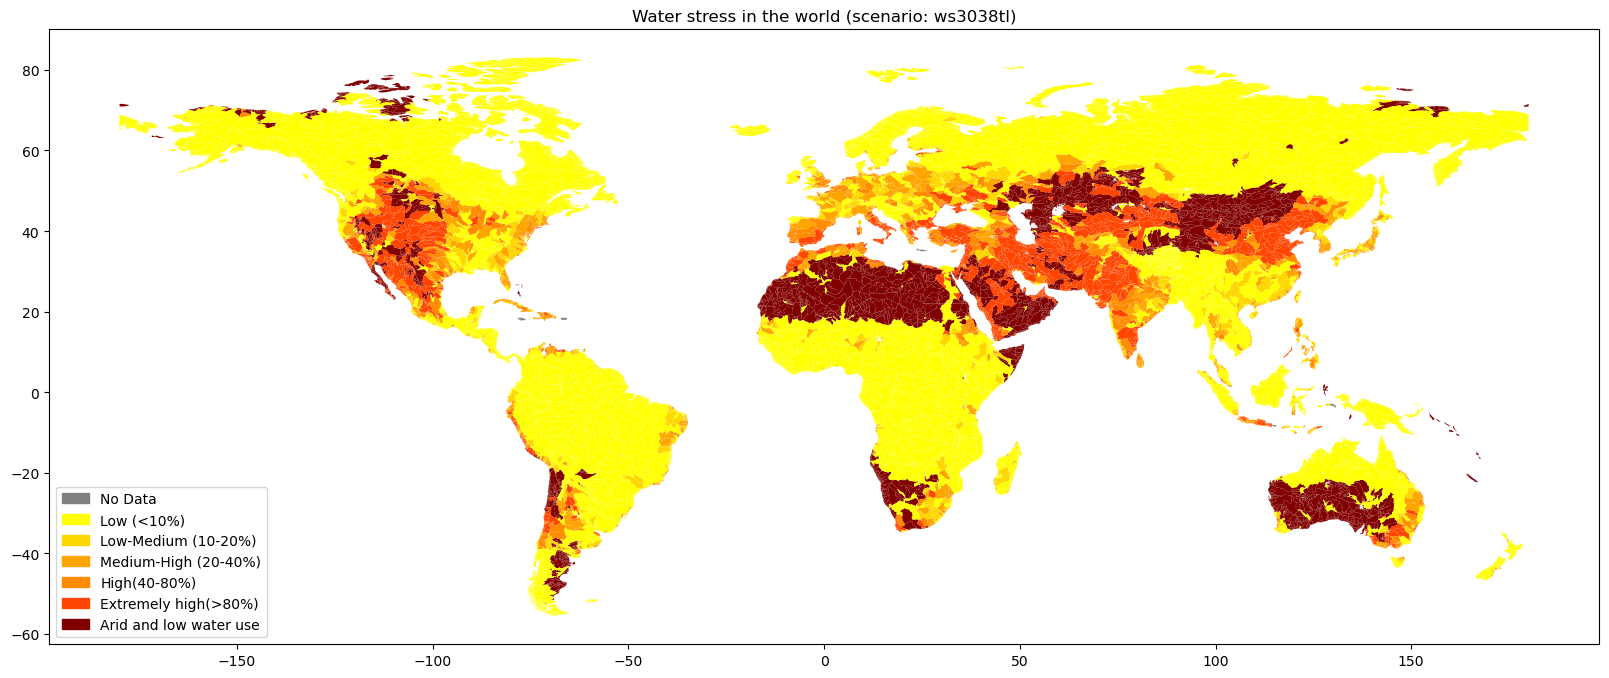

In [6]:
visualisation_zones_stress_monde(scenario, df_total)

## Stress hydrique et mines - exemple de visualisation en Suède

Une autre fonction permet de visualiser les zones de stress hydrique pour un pays, ainsi que les zones minières de ce pays. Nous prenons l'exemple de la Suède, qui est un important pays minier au sein de l'Union Européenne. 


A noter, nous avons un dictionnaire (non utilisé dans notre code ici) qui permet si besoin de trouver les noms de pays et les correspondances entre les différents juex de données. Ce problème ne se pose que pour certains cas particuliers (Congo, Chypre et autres pays/zones disputés) et pas pour les exemples choisis.

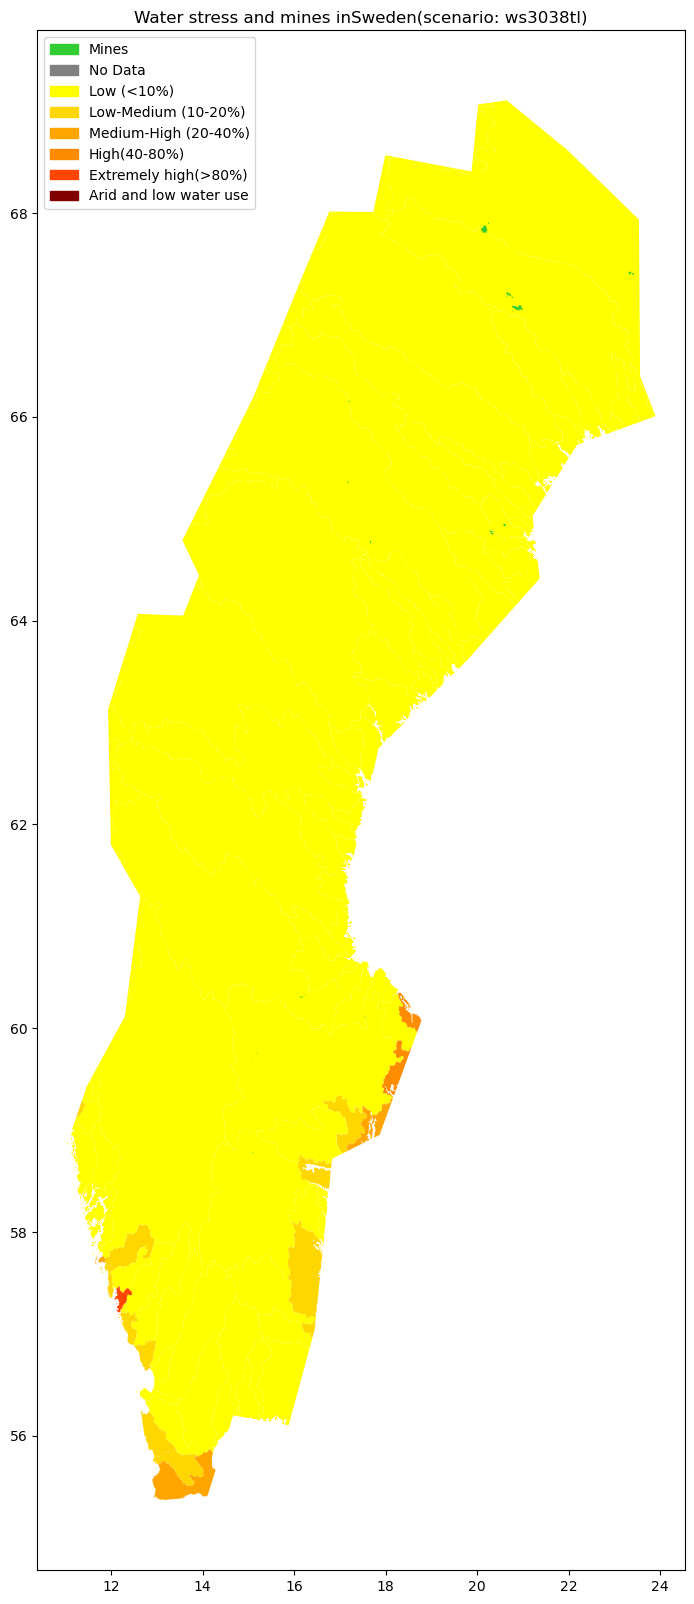

In [7]:
visualisation_zones_pays('Sweden',scenario, df, df_total)

# Évaluation du pourcentage de zones minières situées dans les différentes zones de stress hydrique au niveau mondial et par pays

## au niveau mondial

Nous répondons ensuite à une question très large : quels pourcentages des surfaces minières sont exposés aux différents niveau de stress hydrique, d'abord au niveau mondial puis pour un pays. 

In [8]:
calcul_pourcentages_zones('World', scenario, df_total_mining)

/opt/mamba/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/home/onyxia/work/Mines/visualisation_stress_mines.py:67: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_bystress_pays = df_clean_pays.groupby(['value_risk']).sum()


,Percentage
No data,0.66
Low (<10%),40.29
Low-medium (10-20%),7.14
Medium-high (20-40%),11.98
High (40-80%),3.47
Extremely high (>80%),18.32
Arid and low water use,18.14


## Par pays - exemple de l'Australie

In [9]:
calcul_pourcentages_zones('Australia',scenario, df_total_mining)

/home/onyxia/work/Mines/visualisation_stress_mines.py:67: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_bystress_pays = df_clean_pays.groupby(['value_risk']).sum()


,Percentage
No data,0.00
Low (<10%),50.32
Low-medium (10-20%),10.41
Medium-high (20-40%),8.15
High (40-80%),4.46
Extremely high (>80%),1.80
Arid and low water use,24.86


Mais ces informations, même si elles confirment qu'une part substantielle des zones minières sont à risque de stress hydrique, ne nous donnent pas d'informations quant aux mines et minéraux les plus à risques. 

# Tentative d'identification des types d'exploitations minières par pays et minéraux - le cas du Chili et du cuivre

Nous prenons comme exemple ici le cas du cuivre (copper), minéral en forte demande pour l'industrie électrique et la transition bas-carbone.
Le premier producteur mondial est le Chili, avec plus d'un quart de la production totale, comme le montre le tableau ci-dessous :

In [10]:
pays = 'Chile'
pd.read_excel(shares_prod_2020, 'Copper',header = 1).head()

,Rank 2020,Rank 2019,Country,unit,Production 2020,Share in %,Share cum.%,Share HHI
0,1.0,( 1),Chile,metr. t,5733100,27.578410,27.578410,760.568703
1,2.0,( 2),Peru,metr. t,2150126,10.342931,37.921341,106.976218
2,3.0,( 3),China,metr. t,1718940,8.268761,46.190102,68.372404
3,4.0,( 4),"Congo, D.R.",metr. t,1712964,8.240014,54.430116,67.897829
4,5.0,( 5),United States,metr. t,1200000,5.772460,60.202576,33.321298


Par la fonction précédente appliquée au Chili, nous pouvons constater visuellement qu'une par importante des zones minières chiliennes sont situées dans des zones arides et/ou à important risque. Nous calculons ci-dessous le pourcentage des zones minières selon leurs catégories de stress hydrique dans le scéario choisi. Ce calcul confirme que la quasi-totalité (au sens des surfaces occupées) des exploitations minières chiliennes sont situées dans des zones à très fort stress hydrique. 

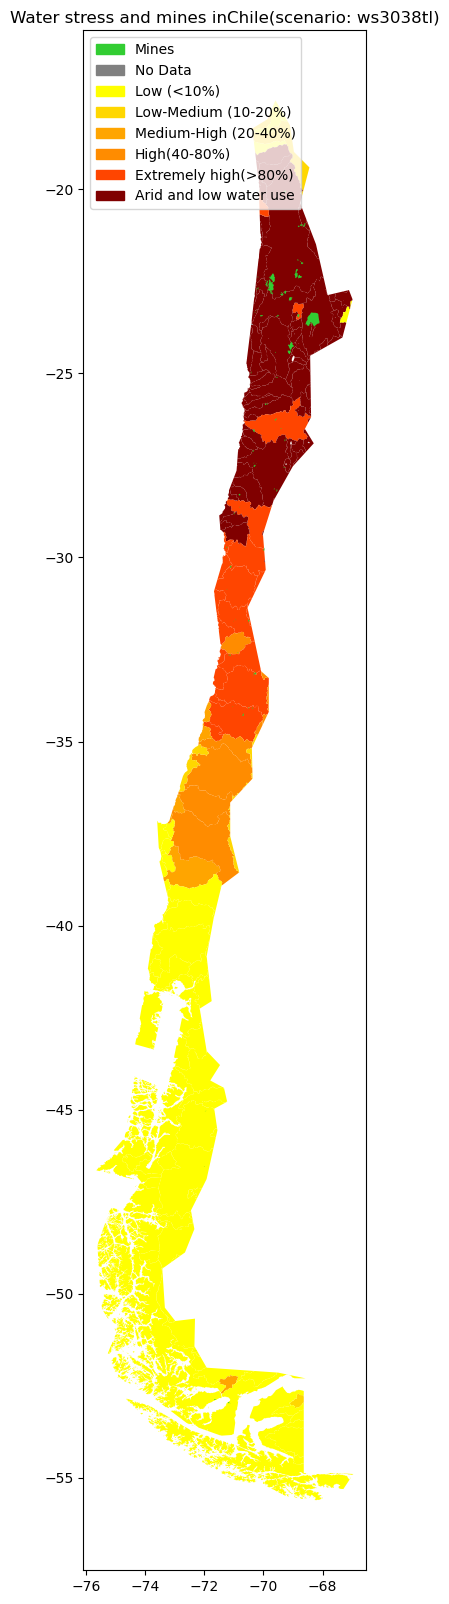

In [11]:
visualisation_zones_pays(pays,scenario, df, df_total)

In [12]:
calcul_pourcentages_zones(pays,scenario, df_total_mining)

/home/onyxia/work/Mines/visualisation_stress_mines.py:67: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_bystress_pays = df_clean_pays.groupby(['value_risk']).sum()


,Percentage
No data,0.00
Low (<10%),0.33
Low-medium (10-20%),0.00
Medium-high (20-40%),0.00
High (40-80%),0.06
Extremely high (>80%),5.68
Arid and low water use,93.93


La question qui se pose alors est de savoir dans quelle mesure la production de cuivre est concernée par ce risque. 
Nous cherchons d'abord à évaluer, à partir des données de world-mining-data.info, quel volume extrait annuellement au Chili est lié à l'exploitation du cuivre. 

La fonction suivante retraite les différents onglets du fichier Excel importé de world-mining-data.info et permet d'obtenir pour les principaux minéraux (nous excluons les métaux précieux et rares, dont les volumes sont très faibles, ainsi que les ressources énergétiques telles que pétrole et gaz) :

• La masse en tonnes extraite en 2020 ;

• Le pourcentage de l'extraction totale du pays que représente cette masse ;

• La part de marché du pays dans la production mondiale pour l'année considérée.

In [13]:
shares_prod_country('Chile', shares_prod_2020)

,country,Production_in_t,%_of_extractions,Share_world_production
Iron (Fe),Chile,9890886,33.36,0.65
Molybdenum,Chile,59381,0.20,20.94
Copper,Chile,5733100,19.34,27.58
Lead,Chile,1386,0.00,0.03
Lithium (Li2O),Chile,49730,0.17,26.76
Zinc,Chile,28662,0.10,0.23
Bentonite,Chile,170,0.00,0.00
Boron Minerals,Chile,288103,0.97,8.00
Diatomite,Chile,21477,0.07,0.95
Feldspar,Chile,329,0.00,0.00


Ce tableau nous permet d'affirmer que plus de la moitiée de la production minière chilienne (en volume) est liée à la production de cuivre. 

En effet, les principaux gisements chiliens de cuivre incluent du minerai de fer dans gisements chalcopyrites (porphyriques) et du molybdène (voir [4], p218). De plus l'exploitation de ces gisements, de faibles teneurs, se fait à ciel ouvert et occupe des grandes surfaces (voir par exemple des photos de la mine d'Escondida au Chili). 

Nous pouvons donc considérer que le pourcentage de production de cuivre à risque est directement proportionnel à la surface minière située dans les différentes zones de stress hydrique. 

Nous allons néanmoins essayer de raffiner cette analyse en tentant d'assigner à chaque mine de cuivre, identifiée par un point issu du webscraping de mindat.org, un polygone minier des travaux de Mauss (2020, [0]).

In [14]:
# pour réduire les temps de calculs, nous limitons les précédents jeux de données aux lignes concernant le Chili.     
data_pays_mines = df.loc[df['COUNTRY_NAME'] == pays]
    
data_pays_stress = df_total.loc[df_total['name'] == pays]

En raison de la non-reproductibilité du webscraping du site mindat.org, nous importons ici "à la main" les points des mines, copiés dans le code source de la page du site puis traités sous Excel afin de les mettres en forme. Nous créons ensuite un geoDataFrame à partir de ces données. 

In [15]:
import geopandas as gpd

test_Chile_copper = pd.DataFrame(
    {'localities' : ['Mantos Blancos Mine, Antofagasta, Antofagasta Province, Antofagasta, Chile','Suerte Cuarta mine, Magallanes district, Estaci\u00f3n Cerro Negro, Cerro Palestina, Antofagasta Province, Antofagasta, Chile estimated]','Suerte Sexta mine, Magallanes district, Estaci\u00f3n Cerro Negro, Cerro Palestina, Antofagasta Province, Antofagasta, Chile estimated]','Suerte Tercera mine, Magallanes district, Estaci\u00f3n Cerro Negro, Cerro Palestina, Antofagasta Province, Antofagasta, Chile estimated]','Las Luces Mine, Esperanza district, Antofagasta Province, Antofagasta, Chile estimated]','Juarez Mine, Michilla District, Antofagasta Province, Antofagasta, Chile estimated]','Michilla Mine, Michilla District, Antofagasta Province, Antofagasta, Chile','Susana Mine, Michilla District, Antofagasta Province, Antofagasta, Chile estimated]','Angela mine, Sierra Gorda, Antofagasta Province, Antofagasta, Chile estimated]','Bella Santiaguina mine, Sierra Gorda, Antofagasta Province, Antofagasta, Chile estimated]','Codiciada mine, Sierra Gorda, Antofagasta Province, Antofagasta, Chile estimated]','Estaca mine, Sierra Gorda, Antofagasta Province, Antofagasta, Chile estimated]','Etna mine, Sierra Gorda, Antofagasta Province, Antofagasta, Chile estimated]','Laura mine, Sierra Gorda, Antofagasta Province, Antofagasta, Chile estimated]','San Antonio mine, Sierra Gorda, Antofagasta Province, Antofagasta, Chile estimated]','Santo Domingo Cu-(Ag) deposit, Taltal, Antofagasta Province, Antofagasta, Chile estimated]','Vaca Muerta meteorite, Taltal, Antofagasta Province, Antofagasta, Chile','El Abra Mine, El Loa Province, Antofagasta, Chile','La Escondida Mine, Escondida, El Loa Province, Antofagasta, Chile','Escondida Norte deposit, La Escondida Mine, Escondida, El Loa Province, Antofagasta, Chile','San Bartolo mine, San Bartolo district, El Loa Province, Antofagasta, Chile','Tuina Mine, San Jose, El Loa Province, Antofagasta, Chile estimated]','Buena Esperanza mine, Punta Blanca area, Tocopilla Province, Antofagasta, Chile estimated]','Mantos de la Luna Cu-(Ag) deposit, Punta Blanca area, Tocopilla Province, Antofagasta, Chile','Cobija meteorite, Tocopilla, Tocopilla Province, Antofagasta, Chile','Judith mine, Caballo Muerto mining district, Cha\u00f1aral Province, Atacama, Chile estimated]','Flor de Tulip\u00e1n mine, El Salado, Cha\u00f1aral, Cha\u00f1aral Province, Atacama, Chile estimated]','Manto Cuba Mine, San Pedro de Cachiyuyo mining district, Inca de Oro mining district, Cha\u00f1aral Province, Atacama, Chile','Santo Domingo Mine, Cha\u00f1aral Province, Atacama, Chile','Azufrada mine, Copiap\u00f3 Province, Atacama, Chile estimated]','Batea Mine, Copiap\u00f3 Province, Atacama, Chile estimated]','Estrella mine, Cabeza de Vaca mining district, Copiap\u00f3 Province, Atacama, Chile estimated]','Japonesa Mine, Cabeza de Vaca mining district, Copiap\u00f3 Province, Atacama, Chile estimated]','Lucero mine, Cabeza de Vaca mining district, Copiap\u00f3 Province, Atacama, Chile estimated]','Manto Barnes mine, Cabeza de Vaca mining district, Copiap\u00f3 Province, Atacama, Chile estimated]','Negrita mine, Cabeza de Vaca mining district, Copiap\u00f3 Province, Atacama, Chile estimated]','San Eduardo mine, Cabeza de Vaca mining district, Copiap\u00f3 Province, Atacama, Chile estimated]','San Pablo mine, Cabeza de Vaca mining district, Copiap\u00f3 Province, Atacama, Chile estimated]','Quebrada Seca Mine, Quebrada Seca, Caldera, Copiap\u00f3 Province, Atacama, Chile estimated]','Descubridora mine, Checo de Cobre mining district, Copiap\u00f3 Province, Atacama, Chile estimated]','Mandiola mine, Checo de Cobre mining district, Copiap\u00f3 Province, Atacama, Chile estimated]','San Samuel Mine, Carrera Pinto, Cachiyuyo de Llampos mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile','Dulcinea de Llampos Mine, Cachiyuyo de Llampos mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile','Amarilla Mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Aniversario Gal\u00e9s mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Arenilla mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Carmen Alto mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Casualidad mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Farellones mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Linderos mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Pe\u00f1on mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Pe\u00f1oncito mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Polemica mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Quebradita mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Rinc\u00f3n mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Rosario mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','San Pedro mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Santa F\u00e9 mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Sara mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Vizcacha Alta mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','La Leona mine, Copiap\u00f3 Province, Atacama, Chile estimated]','La Turca mine, Copiap\u00f3 Province, Atacama, Chile estimated]','Descubridora mine, San Antonio district, Potrero Grande, Copiap\u00f3 Province, Atacama, Chile estimated]','Gu\u00edas de Picones, San Antonio district, Potrero Grande, Copiap\u00f3 Province, Atacama, Chile estimated]','Farell\u00f3n mine, Puquios mining district, Copiap\u00f3 Province, Atacama, Chile estimated]','Sofia Mine, Puquios mining district, Copiap\u00f3 Province, Atacama, Chile estimated]','Carolina mine, Sierra Desierto mining district, Copiap\u00f3 Province, Atacama, Chile estimated]','Socav\u00f3n Rampa Mine, Copiap\u00f3 Province, Atacama, Chile estimated]','Carmen Bajo Mine, Candelaria Copper mining complex, Tierra Amarilla, Copiap\u00f3 Province, Atacama, Chile','La Farola Mine, Cerro Pintado, Las Pintadas mining district, Tierra Amarilla, Copiap\u00f3 Province, Atacama, Chile','Jote Mine, Pampa Larga mining district, Tierra Amarilla, Copiap\u00f3 Province, Atacama, Chile','Veta Negra Mine, Pampa Larga mining district, Tierra Amarilla, Copiap\u00f3 Province, Atacama, Chile','Angela Mine, El Orito district, Huasco Province, Atacama, Chile estimated]','Turin mine, El Orito district, Huasco Province, Atacama, Chile estimated]','Verdona mine, El Morado district, Freirina, Huasco Province, Atacama, Chile estimated]','Lolita mine, Sierra Perdices, Freirina, Huasco Province, Atacama, Chile estimated]','Sierra Totorita mine, Sierra Perdices, Freirina, Huasco Province, Atacama, Chile estimated]','Los Pelambres Mine, Salamanca, Choapa Province, Chile','Carmen de Andacollo mine, Andacollo, Elqui Province, Coquimbo, Chile','Churrumata mine, Andacollo, Elqui Province, Coquimbo, Chile estimated]','Canto Sur Mine, El Indio deposit, Elqui Province, Coquimbo, Chile estimated]','Casus mine, La Higuera, Elqui Province, Coquimbo, Chile estimated]','Volcano mine, Los Choros, La Higuera, Elqui Province, Coquimbo, Chile estimated]','Porvenir mine, La Higuera, Elqui Province, Coquimbo, Chile estimated]','El Romeral mine, La Serena, Elqui Province, Coquimbo, Chile','Potrerillos mine, Punta Colorada-Agua Grande, Elqui Province, Coquimbo, Chile estimated]','El Cisne mine, Vicu\u00f1a, Elqui Province, Coquimbo, Chile estimated]','El Pique Mine, Tamaya, Coquimbo, Chile estimated]','Porvenir mine, Cerro Desesperado, Llanquihue Province, Los Lagos, Chile estimated]','Teniente Mine, El Teniente, Rancagua, Cachapoal Province, OHiggins, Chile','Los Bronces Mine, Santiago Province, Santiago, Chile','La Africana Mine, Pudahuel, Santiago Province, Santiago, Chile','Chanabayita mine, Chanabaya, Iquique Province, Tarapac\u00e1, Chile','Tarapac\u00e1 Viejo, Iquique Province, Tarapac\u00e1, Chile','San Oscar mine, Huara, Tamarugal Province, Tarapac\u00e1, Chile estimated]','Ujina deposit, Collahuasi Mine, Collahuasi mining district, Pica, Tamarugal Province, Tarapac\u00e1, Chile','Quebrada Blanca Mine, Collahuasi mining district, Pica, Tamarugal Province, Tarapac\u00e1, Chile'],
     'Latitude': [-23.438679089724,-23.5,-23.5,-23.5,-24.26656049376836,-24.26656049376836,-22.7122222222,-24.26656049376836,-23.260655519418293,-23.260655519418293,-23.260655519418293,-23.260655519418293,-23.260655519418293,-23.260655519418293,-23.260655519418293,-25.313990480738717,-25.75,-21.9205555556,-24.215226560131,-24.215226560131,-22.7333388889,-22.87215282213752,-22.038354205013118,-22.255,-22.5666666667,-26.26848966159736,-26.402519519756,-26.745277777778,-26.459880203952,-27.4938581595718,-27.488248721605057,-27.4938581595718,-27.4938581595718,-27.4938581595718,-27.4938581595718,-27.4938581595718,-27.4938581595718,-27.4938581595718,-27.28620602654732,-27.4938581595718,-27.4938581595718,-27.072222222222,-27.1483333333,-28.0333333333,-28.0333333333,-28.0333333333,-28.0333333333,-28.0333333333,-28.0333333333,-28.0333333333,-28.0333333333,-28.0333333333,-28.0333333333,-28.0333333333,-28.0333333333,-28.0333333333,-28.0333333333,-28.0333333333,-28.0333333333,-28.0333333333,-27.4938581595718,-27.4938581595718,-27.4938581595718,-27.4938581595718,-27.4938581595718,-27.4938581595718,-27.4938581595718,-27.488248721605057,-27.5144890251,-27.5902777778,-27.608611111111,-27.600833333333,-28.778372274386694,-28.778372274386694,-28.855366133613426,-28.855366133613426,-28.855366133613426,-31.7138888889,-30.241578766321,-30.146701390937913,-29.826554844550675,-29.364180833372252,-29.364180833372252,-29.364180833372252,-29.721944,-29.826554844550675,-29.944252257224843,-30.618721950716676,-41.393796876098804,-34.0886111111,-33.149265422398,-33.46013283253,-20.9088888889,-19.917414,-19.597819911805622,-20.9927777778,-21.00168271738],
     'Longitude': [-70.063880248825,-69.4666666667,-69.4666666667,-69.4666666667,-69.58323743261595,-69.58323743261595,-70.1919444444,-69.58323743261595,-69.30737908188725,-69.30737908188725,-69.30737908188725,-69.30737908188725,-69.30737908188725,-69.30737908188725,-69.30737908188725,-69.86439622165337,-70.05,-68.8325,-69.060970544815,-69.060970544815,-68.2333222222,-68.19199298534005,-69.55826551991508,-70.1455555556,-70.25,-69.4532114763244,-69.898142358985,-69.833888888889,-70.005039721727,-69.87934790234978,-69.870131790559,-69.87934790234978,-69.87934790234978,-69.87934790234978,-69.87934790234978,-69.87934790234978,-69.87934790234978,-69.87934790234978,-70.71313753763532,-69.87934790234978,-69.87934790234978,-69.989166666667,-69.9616666667,-70.1333333333,-70.1333333333,-70.1333333333,-70.1333333333,-70.1333333333,-70.1333333333,-70.1333333333,-70.1333333333,-70.1333333333,-70.1333333333,-70.1333333333,-70.1333333333,-70.1333333333,-70.1333333333,-70.1333333333,-70.1333333333,-70.1333333333,-69.87934790234978,-69.87934790234978,-69.87934790234978,-69.87934790234978,-69.87934790234978,-69.87934790234978,-69.87934790234978,-69.870131790559,-70.2883955425,-70.35,-70.156388888889,-70.163055555556,-70.55623050674018,-70.55623050674018,-71.1907867076123,-71.1907867076123,-71.1907867076123,-70.4888888889,-71.102801250415,-70.88484275086604,-70.7302504825319,-70.9295847073345,-70.9295847073345,-70.9295847073345,-71.235833,-70.7302504825319,-70.32563867316857,-70.8604553135379,-72.77471255409921,-70.4625,-70.280914306641,-70.814130020142,-70.1380555556,-69.513611,-69.6627737510583,-68.6372222222,-68.808583068848]
    })

test_Chile_copper["points"] = gpd.points_from_xy(test_Chile_copper.Longitude, test_Chile_copper.Latitude , crs="EPSG:4326")

points_Chile_copper = gpd.GeoDataFrame(test_Chile_copper[["localities","points"]], geometry='points')


## Identification des mines de cuivre au Chili

La réprésentation sur une carte du Chili des points des mines et des zones minières nous permet de constater que ces deux géométries ne permettent pas d'identifier directement les surfaces minières, car certains points sont très éloignés des zones minières connues.

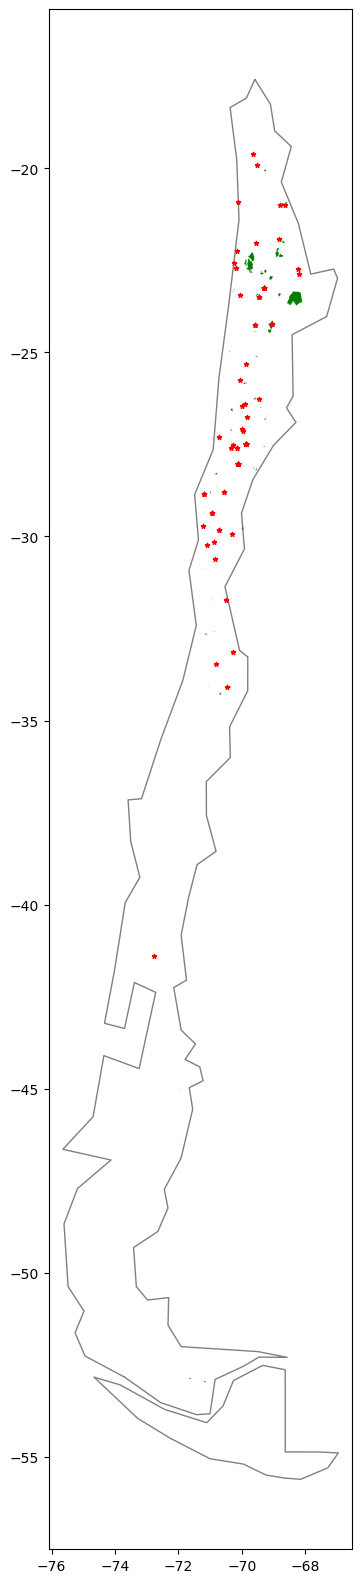

In [16]:
base_graphe = countries.loc[countries['name'] == pays].plot(edgecolor = 'grey', color = 'white', figsize=(20, 20))
data_pays_mines.plot(ax=base_graphe, color='green')
points_Chile_copper.plot(ax=base_graphe, marker='*', color='red', markersize=10);

Nous utilisons donc la fonction ci-dessous qui, très frustrement, assigne des zones minières à des points. Cette fonction se décompose en deux étapes : 

• La première (suppress_duplicates_and_close) consiste à ne garder qu'un seul point lorsque les coordonnées de plusieurs points sont identiques, puis à ne garder qu'un des points lorsque la distance entre ceux-ci est inférieure à un paramètre distance_max (en km, 10 km ci-dessous). Ce rapprochement des points proches, bien que très basique, a du sens car les exploitations de cuivre sont de grandes tailles et il est peu probable d'avoir plusieurs gisements très importants exploitables dans un périmètre réduit, même dans des zones désertiques comme le nord du Chili. Cette étape réduit le nombre de mines recherchées de 97 à 45 (dont 25 points dont les coordonnées étaient doubles).

• La deuxième étape (add_closest_polygon) revient à assigner à chaque point une zone minière, en attribuant d'abord à chaque point le polygone le plus proche. Ensuite, nous rebouclons pour éviter qu'un même polygone ne soit attribué à plusieurs points, et enfin nous supprimons les associations points-polygones lorsque la distance entre les deux objets est supérieure à un paramètre (ici 70 km).

Cette approche nous permet de 97 mines (points) à 33 surfaces minières (polygones) identifiées comme étant des mines de cuivre. 

In [17]:
from assign_mines import *

In [18]:
couples_mines_zones = gpd.GeoDataFrame(assign_polygons_points(test_Chile_copper, data_pays_mines, 10, 70).rename(columns ={'polygons':'geometry'}))


/opt/mamba/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/onyxia/work/Mines/assign_mines.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matrix_distances_points = matrix_distances_points.append(new_row, ignore_index=True).round(decimals = 2)
/opt/mamba/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
 

In [19]:
calcul_pourcentages_zones_mineral(scenario, couples_mines_zones, df_total)

/opt/mamba/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/home/onyxia/work/Mines/assign_mines.py:105: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_bystress2 = df_test2.groupby(['value_risk']).sum()


,Percentage
No data,0.00
Low (<10%),0.00
Low-medium (10-20%),0.00
Medium-high (20-40%),0.00
High (40-80%),0.00
Extremely high (>80%),4.83
Arid and low water use,95.17


Nous pouvons donc confirmer que l'ensemble identifiable de la production de cuivre au Chili est situé dans des zones à fort risque hydrique.  

## Autre approche tentée - proximité des noms des mines

Nous avons rapidement étudié une autre méthode pour réduire le nombre de points qui représentent les mines. Cette approche repose sur une analyse de distance entre les noms des localités des mines, que nous tirons du webscraping et qui correspond à la colonne 'localities' de notre fichier points_Chile_copper. 

In [20]:
points_Chile_copper

,localities,points
0,"Mantos Blancos Mine, Antofagasta, Antofagasta ...",POINT (-70.06388 -23.43868)
1,"Suerte Cuarta mine, Magallanes district, Estac...",POINT (-69.46667 -23.50000)
2,"Suerte Sexta mine, Magallanes district, Estaci...",POINT (-69.46667 -23.50000)
3,"Suerte Tercera mine, Magallanes district, Esta...",POINT (-69.46667 -23.50000)
4,"Las Luces Mine, Esperanza district, Antofagast...",POINT (-69.58324 -24.26656)
...,...,...
92,"Chanabayita mine, Chanabaya, Iquique Province,...",POINT (-70.13806 -20.90889)
93,"Tarapacá Viejo, Iquique Province, Tarapacá, Chile",POINT (-69.51361 -19.91741)
94,"San Oscar mine, Huara, Tamarugal Province, Tar...",POINT (-69.66277 -19.59782)
95,"Ujina deposit, Collahuasi Mine, Collahuasi min...",POINT (-68.63722 -20.99278)


Les str contenus dans cette colonne sont essentiellement de la forme "nom de la mine, nom de la municipalité, nom de la province, nom du pays". Des chaînes de caractères proches devraient donc correspondre à des mines proches géographiquement. Nous allons ici vérfier la proximité des résultats entre l'approche géographique précédente et l'approche par NLP. 
 
Par le fichier comparaison_noms.py, nous importons deux fonctions:

• clean_strings, qui permet de nettoyer les chaînes de caractères contenus dans la colonne 'localities' du dataframe en entrée. Ce nettoyage consiste en la suppression des caractères spéciaux, nombres, balises HTLM et en la conversion de tous les caractères en minuscules. Ultimement, nous n'avons des chaînes de caractères qu'avec des lettres simples sans minuscules et des espaces. 

• add_columns_with_Lev_distances, qui prend en entrée un dataframe traité de façon à nettoyer la colonne contenant les str. Cette fonction calcule la distance de Levenshtein entre les différentes chaînes de caractère et crée une colonne ('lev_dist') avec la plus petite distance associée à chaque point. De même nous créons la colonne ('dist_points') avec la plus petite distance géographique strictement positive entre un point et un point voisin. Nous ajoutons également une colonne 'dupli' qui nous indique si les coordonnées des points se trouvent en double dans le dataframe (1) ou si la valeur est unique (0).


In [21]:
from comparaison_noms import *

In [22]:
df_distances_str = add_columns_with_Lev_distances(clean_strings(points_Chile_copper))

/home/onyxia/work/Mines/comparaison_noms.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  s['t2'] = s["t1"].str.replace("[^abcdefghijklmnopqrstuvwxyz ]", "").str.strip(' ') # ne conserve que les caractères en minuscule et les espaces


/opt/mamba/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/onyxia/work/Mines/comparaison_noms.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matrix_distances_points = matrix_distances_points.append(new_row, ignore_index=True).round(decimals = 2)


A partir de ce dataframe, nous pouvons observer ci-dessous que les points dont les coordonnées sont en double semblent identifiables. 

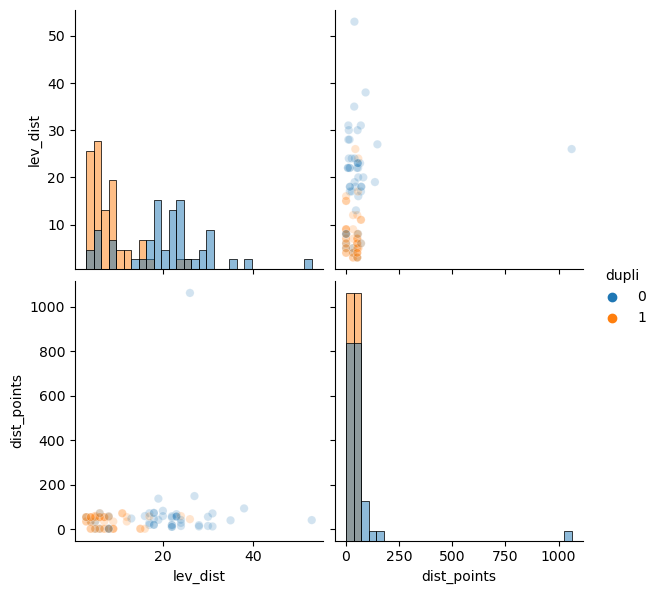

In [ ]:
import seaborn as sns

columns = ["lev_dist", "dist_points"]
_ = sns.pairplot(
    data=df_distances_str,
    vars=columns,
    hue='dupli',
    plot_kws={"alpha": 0.2},
    height=3,
    diag_kind="hist",
    diag_kws={"bins": 30},
)

Nous avons cherché à étudier la régression logistique de 'dupli' par 'lev_dist' ou 'lev_dist' et 'dist_points' mais sans résultats probants. 

In [67]:
data = df_distances_str[['lev_dist', 'dupli']]
import numpy as np
import sklearn 
sklearn.set_config(display="diagram")
from sklearn.model_selection import train_test_split

dupli_train, dupli_test = train_test_split(data, random_state=0)

data_train = np.array(dupli_train['lev_dist'].values.tolist()).reshape(-1, 1)
data_test = np.array(dupli_test['lev_dist'].values.tolist()).reshape(-1, 1)

target_train = dupli_train['dupli']
target_test = dupli_test['dupli']

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(StandardScaler(), LogisticRegression(penalty="none"))
logistic_regression.fit(data_train, target_train)
accuracy = logistic_regression.score(data_test, target_test)
print(f"Accuracy on test set: {accuracy:.2f}")

coefs = logistic_regression[-1].coef_[0]  # the coefficients is a 2d array
#weights = pd.Series(coefs, index=culmen_columns)
coefs

Accuracy on test set: 0.68


/opt/mamba/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


array([-2.47403707])

# Conclusion et travaux complémentaires



Réciproquement, il serait intéressant, avec plus de temps, de chercher à estimer l'impact de l'exploitation minière sur la consommation d'eau et donc sur l'augmentation prévisible du stress hydrique. Cette étude pourrait consister à isoler les zones minières, et à comparer les données chiffrées des scénarios de stress hydrique et leurs évolution au cours du temps à des zones proches et similaires mais qui ne contiennent pas d'exploitations minières.

# Bibliographie

[0] Maus, V., Giljum, S., Gutschlhofer, J. et al. A global-scale data set of mining areas. Sci Data 7, 289 (2020). https://doi.org/10.1038/s41597-020-00624-w

[1] https://www.ecologie.gouv.fr/sites/default/files/rapport_cgdd_01_mobilite_bas_carbone_fevrier2022.pdf

[2} https://www.researchgate.net/publication/350514545_Les_pressions_sur_l'eau_face_ignoree_de_la_transition_energetique

[3] https://www.lesechos.fr/finance-marches/marches-financiers/les-mines-de-cuivre-au-chili-premieres-victimes-du-manque-deau-1340672

[4] Stephen E. Kesler, Adam C. Simon - Mineral Resources, Economics and the Environment-Cambridge University Press (2015) 